In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# Lecture 05 - JSON, XML and HTML
by Vítek Macháček <br>
March 20-21

### May 9th - Operator ICT - Benedikt Kotmel


### Table of contents

* Standardized data representation
* JSON
* XML
* Introduction to BeautifulSoup
* Basics of HTML (+ Element Inspection)
* Introduction to Requests (GET vs. POST) and APIs


## Structured data
* only data. It does not do anything!
* More general than tables
* distributed as text/string
* text files or APIs.

### Communication 
* Server -> client
* Server -> Server
* Application -> Application

* Only transferring of data
* Both sides need to understand the structure

### Storing
* self-descriptive
* human readable


### Standardization
* predictability
* cooperation
* spillovers from standardization

## JSON
* JavaScript Object Notation
* often *.json* files
* but also used in the web etc.
* supports standard datatypes - strings, integers, floats, lists

In [ ]:
teachers = [{'name':'Jozef Baruník','titles':['doc.','PhDr.','Ph.D.','Bc.','Mgr.'],'ID':1234,'courses':['JEM005','JEM116','JEM059','JEM061']},
            {'name':'Martin Hronec','titles':['Bc.','Mgr.'],'ID':3421,'courses':['JEM005','JEM207']},
            {'name':'Lukáš Vácha','titles':['Bc.','Mgr.','Ph.D.'],'ID':5678,'courses':['JEM059','JEM061']}]
courses = {
    'JEM005':{'name':'Advanced Econometrics','ECTS':6,'teachers':[3421,1234]},
    'JEM207':{'name':'Data Processing in Python','ECTS':5,'teachers':[3421]},
    'JEM116':{'name':'Applied Econometrics','ECTS':6,'teachers':[1234]},
    'JEM059':{'name':'Quantitative Finance I.','ECTS':6,'teachers':[1234,5678]},
    'JEM061':{'name':'Quantitative Finance II.','ECTS':6,'teachers':[1234,5678]}
}
js = {'teachers':teachers,'courses':courses}
js

https://jsonformatter.curiousconcept.com/

In [ ]:
import json
print(json.dumps(js,indent=4))

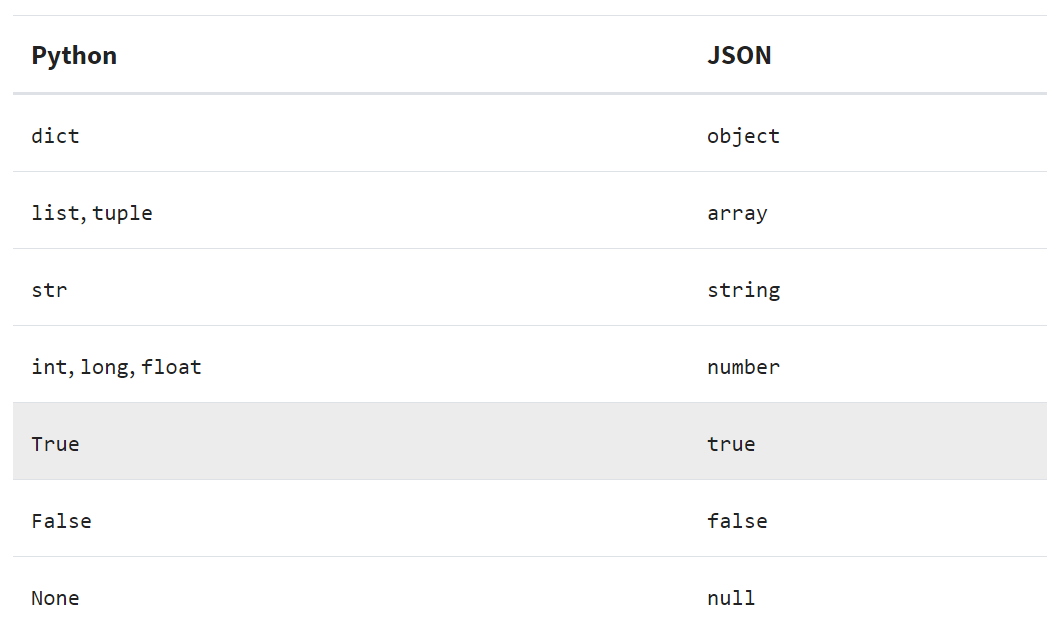

In [ ]:
pd.read_json(json.dumps(js['teachers']))

In [ ]:
dfc = pd.read_json(json.dumps(js['courses']),orient='index')
dfc

In [ ]:
dfc.loc[dfc.teachers.apply(lambda x: 5678 in x)]

## GeoJSON

* One standardized data format for transferring geodata
* Plenty of geodata out there
* see for example http://opendata.iprpraha.cz/CUR/DTMP/PRAHA_P/WGS_84/PRAHA_P.json

In [ ]:
#!pip install folium
import folium
m = folium.Map(location=[50.085,14.45],zoom_start=11)
if False:
    folium.GeoJson('http://opendata.iprpraha.cz/CUR/DTMP/PRAHA_P/WGS_84/PRAHA_P.json').add_to(m)
m

In [ ]:
d = requests.get('http://opendata.iprpraha.cz/CUR/DTMP/TMMESTSKECASTI_P/WGS_84/TMMESTSKECASTI_P.json').json()

In [ ]:
d.keys()

# eXtensible Markup Language (XML)

* elements
* attributes
* tags

### Tag
> <>

### Element

In [ ]:
#either
'''<element>content</element>'''

#or no content (self-closing)
'''<element />''';

### Attributes

In [ ]:
'''<element attr="value" />''';

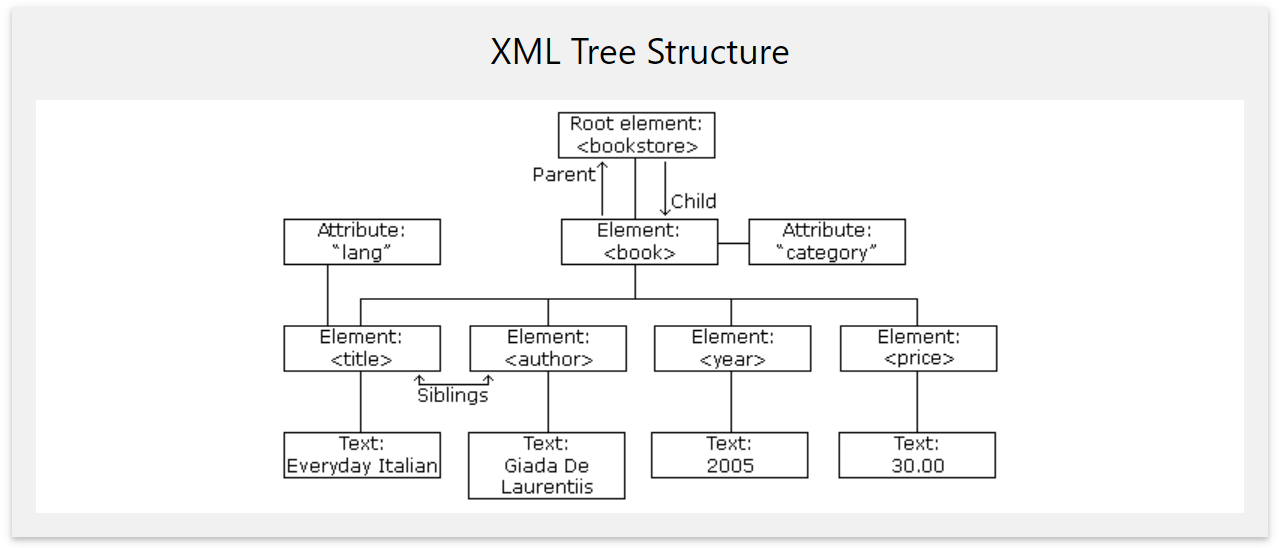


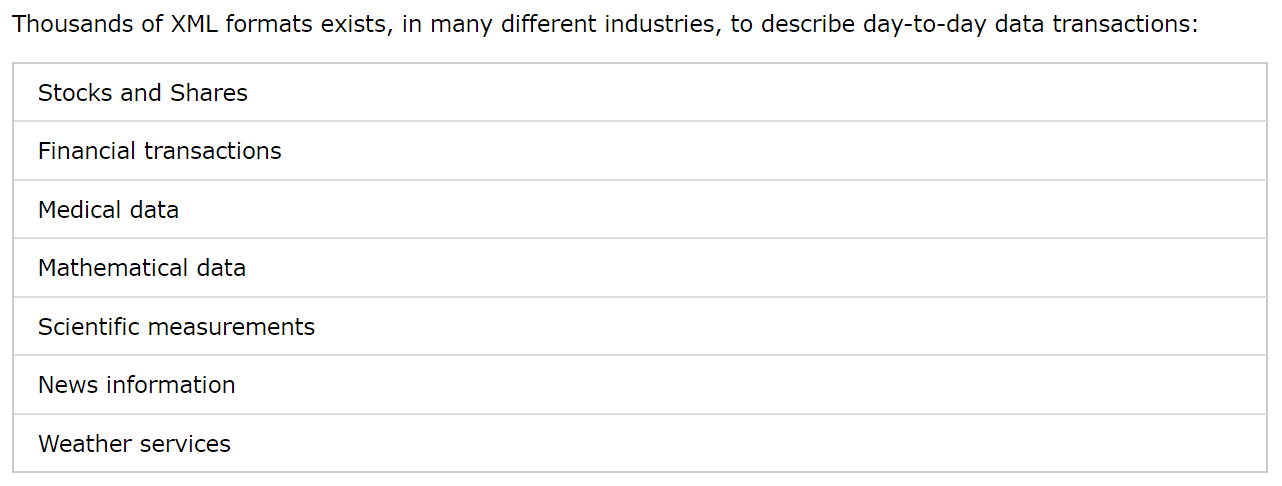

https://www.w3schools.com/xml/xml_rss.asp

## Navigation
* Xpath
* CSS selectors 
* **BeautifulSoup**

### BeatifulSoup in detail
each BS object represents
* an element
* the position in tree

In [ ]:
xml = '''
<?xml version="1.0" encoding="utf-8"?>
<courses>
    <course id="JEM005" ects="6" name="Advanced Econometrics">
        <teacher-id>3421</teacher-id>
        <teacher-id>1234</teacher-id>
    </course>
    <course id="JEM207" ects="5" name="Data Processing in Python">
        <teacher-id>3421</teacher-id>
    </course>
        <course id="JEM116" ects="6" name="Applied Econometrics I.">
        <teacher-id>1234</teacher-id>
    </course>
    <course id="JEM059" ects="6" name="Quantitative Finance I.">
        <teacher-id>1234</teacher-id>
        <teacher-id>5678</teacher-id>
    </course>
    <course id="JEM061" ects="6" name="Quantitative Finance II.">
        <teacher-id>1234</teacher-id>
        <teacher-id>5678</teacher-id>
    </course>
</courses>
'''

soup = BeautifulSoup(xml,'xml')
soup

```find()``` will find a **first** element given the input

In [ ]:
course = soup.find('course',{'id':'JEM059'})
course

`soup['attr']` will return the value of attribute 

In [ ]:
course['name']

`.findAll()` finds all children given the input

In [ ]:
course.findAll('teacher-id')

In [ ]:
[c.text for c in course.findAll('teacher-id')]

you can also navigate horizontally

In [ ]:
course.findNext('course')

In [ ]:
course.findPrevious('course')

and even upstream!

In [ ]:
course.parent

In [ ]:
l = []
for course in soup.findAll('course'):
    d = {'id':course['id'],
         'name':course['name'],
         'ects':course['ects'],
         'teachers':[int(t.text) for t in course.findAll('teacher-id')]}
    l.append(d)
pd.DataFrame(l)

# HTML
standard web-page consists of:

* Client side
    * HTML "DOM" structure - the website content
    * CSS stylesheets - website graphics
    * JavaScripts - website interactivity
* Server side
    * Server, database, etc.

## Web-scraping
* always client side only
* Navigating HTML DOM by taking advantage of CSS structure

## DOM (Document Object Module):


In [ ]:
html = '''
<html>
    <head>
        <title>Sample page</title>
        
    <script></script>
    </head>
    
    <body>
        <div id="header">
            My page header
        </div>
        <div id="content">
            <table>
                <tr class="firstRow">
                    <td>A</td>
                    <td>1</td>
                </tr>
                <tr class="normalRow">
                    <td>B</td>
                    <td>2</td>
                </tr>
                <tr class="normalRow">
                    <td>C</td>
                    <td>3</td>
                </tr>
            </table>
        </div>
    </body>
</html>
'''
from IPython.core.display import display, HTML
display(HTML(html))



In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'xml')

datarows = soup.findAll('tr',{'class':'normalRow'})
datarows

In [ ]:
for row in datarows:
    pass

## HTML Inspection
http://ies.fsv.cuni.cz/cs/node/51

# APIs and requests

API = *Application Programming Interface*

we use it in a context of webserver's endpoint - HTTP API

[Example API](http://ec2-18-188-88-0.us-east-2.compute.amazonaws.com:4466/)

### When to use?
* when more applications need to communicate automatically?
* user-friendly interface for complicated tasks - DEEP AI
* Data - scientometrics etc.

### GET request
* fast
* public
* data flow only one direction
* parameters via request adress

> vitekzkytek.cz/index.html?name1=value1&name2=value2

In [ ]:
import requests
r = requests.get('http://www.google.com')
r

### POST request
* slow
* private
* both sides can send data



## Static pages x Dynamic pages

### Static
* usually generated from a single GET request
* all information necessary for drawing a website is already in 
* everything happens on client's side
* all parameters within the adress!


### Dynamic content
* webpage communicates with the webserver and the database
* solution -> Selenium!

## How to chose data source for project

You need to know in advance what data you will download:

1. full or satisfactory access to API
2. the web-page is parsable (prefer not too much javascript)
3. plan to generate all requests

# APIs Example
### Get wiki data using GET

In [ ]:
import requests
from bs4 import BeautifulSoup
response = requests.get('https://en.wikipedia.org/wiki/Charles_University')
soup = BeautifulSoup(response.text,'lxml')
div = soup.find('div',{'id':'mw-content-text'}) #  #mw-content-text > div > p:nth-child(10)texts)
article = ' '.join([p.text for p in div.find_all('p')])
article

### Ask DeepAI using POST request

In [ ]:
%run '/home/vitekzkytek/jupyter/Teaching/PythonDataIES/auth.py'

r = requests.post(
    "https://api.deepai.org/api/summarization",
    data={
        'text': article,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()

# Bonus example:

<img src="http://ies.fsv.cuni.cz/default/file/get/id/31996" height="500" width="300">

In [ ]:
img = 'http://ies.fsv.cuni.cz/default/file/get/id/31996'
r = requests.post(
    "https://api.deepai.org/api/demographic-recognition",
    data={
        'image': img,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()


In [ ]:
r = requests.post(
    "https://api.deepai.org/api/celebrity-recognition",
    data={
        'image': img,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()


In [ ]:
r = requests.post(
    "https://api.deepai.org/api/nsfw-detector",
    data={
        'image': img,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()
